In [1]:
import _pickle as pickle
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

from cycler import cycler
from pprint import pprint

from jaxl.plot_utils import set_size


sns.set_style("darkgrid")
sns.set_palette("colorblind")

# But with fonts from the document body
# XXX: For paper plotting
# plt.rcParams.update(pgf_with_latex)

linestyle_cycler = cycler(color=sns.color_palette()[:4]) + cycler(
    linestyle=["-", "--", ":", "-."]
)
plt.rc("axes", prop_cycle=linestyle_cycler)

In [2]:
doc_width_pt = 750.0

In [3]:
icl_paths = {
    "fine grain": "/home/bryanpu1/projects/jaxl/scripts/icl_nc/context_len_16-num_blocks_8-standard_mnist-test-errors.pkl",
    "random label (full-context length)": "/home/bryanpu1/projects/jaxl/scripts/icl_nc/context_len_16-num_blocks_8-fixed_length-random_label-standard_mnist-test-errors.pkl",
}

baseline_paths = [
    "/home/bryanpu1/projects/jaxl/scripts/icl_nc/cnn-dim_10-standard_mnist-test-baseline-errors.pkl",
    "/home/bryanpu1/projects/jaxl/scripts/icl_nc/cnn-dim_2-deeper-standard_mnist-test-baseline-errors.pkl",
]

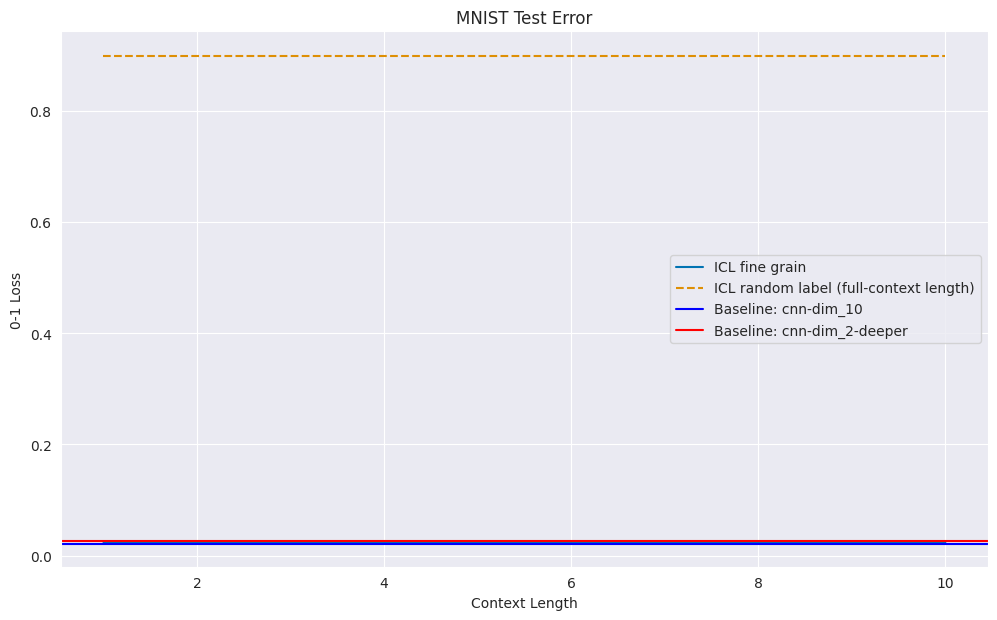

In [5]:
ncols = 1
nrows = 1
fig, axes = plt.subplots(
    nrows,
    ncols,
    figsize=set_size(doc_width_pt, 0.95, (nrows, ncols), True),
    layout="constrained",
)

for icl_key, icl_path in icl_paths.items():
    icl_res = pickle.load(open(icl_path, "rb"))
    axes.plot(
        list(icl_res.keys()),
        [np.mean(errors) for errors in icl_res.values()],
        label="ICL {}".format(icl_key),
    )

for baseline_path, color in zip(baseline_paths, ["blue", "red"]):
    baseline_name = os.path.basename(baseline_path).split("-standard_mnist-")[0]
    baseline_res = pickle.load(open(baseline_path, "rb"))
    axes.axhline(
        np.mean(baseline_res),
        label="Baseline: {}".format(baseline_name),
        c=color,
    )

axes.set_ylabel("0-1 Loss")
axes.set_xlabel("Context Length")
axes.set_title("MNIST Test Error")
axes.legend()

plt.show()
plt.close()